In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pymysql
import warnings
warnings.filterwarnings("ignore")

In [210]:
dbcon= pymysql.connect(host="localhost",user="root",password="S8gerrar*",database="amazondb")

### Product Analysis

In [211]:
# Fetching total  quantity sold across all product categories
Quantity_sold = pd.read_sql_query("""select `product line`,sum(quantity) as quarterly_sales from amazon group by `product line`""",dbcon)

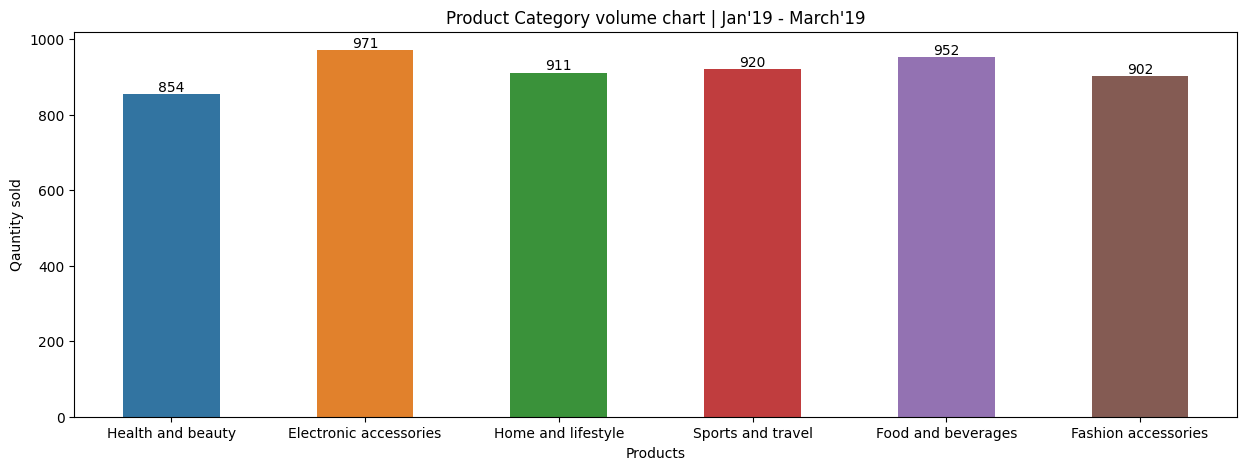

In [212]:
plt.figure(figsize=(15,5))
ax = sns.barplot(Quantity_sold,x="product line",y="quarterly_sales",width=0.5,hue="product line")
plt.title("Product Category volume chart | Jan'19 - March'19")
plt.xlabel("Products")
plt.ylabel("Qauntity sold")
for container in ax.containers:
    ax.bar_label(container)

In [213]:
# Fetching month quantity sold data
monthly_quantity_sold = pd.read_sql_query("""select `product line`,monthname,sum(quantity) as quantity_sold from amazon group by `product line`,monthname""",dbcon)

In [214]:
# Setting up the order of the month
new_order = ['January','February','March']
monthly_quantity_sold['monthname'] = pd.Categorical(monthly_quantity_sold['monthname'],categories=new_order,ordered=True)
monthly_quantity_sold.sort_values(by="monthname",inplace=True)

Text(0, 0.5, 'Qauntity Sold')

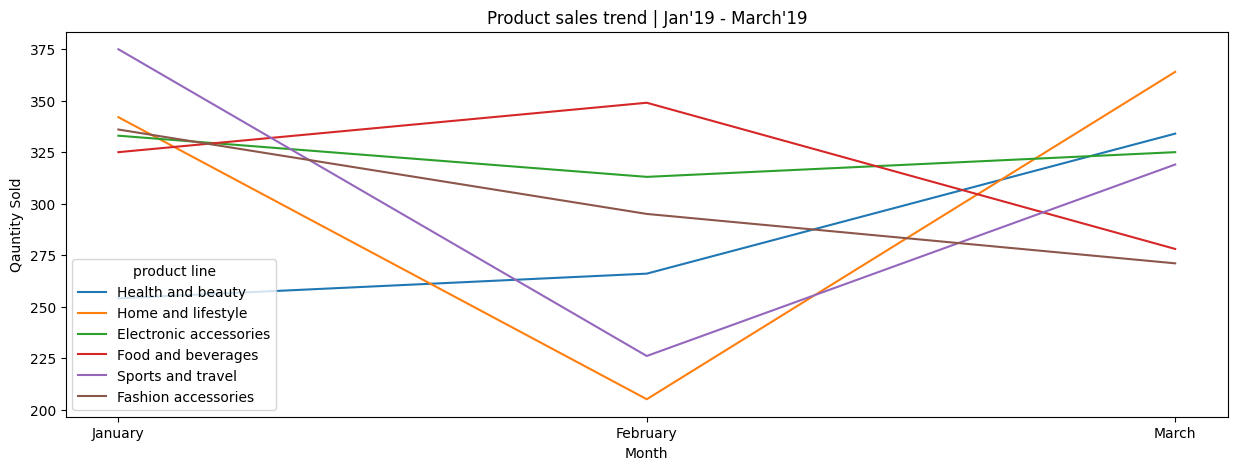

In [215]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=monthly_quantity_sold,x="monthname",y="quantity_sold",hue="product line")
plt.title("Product sales trend | Jan'19 - March'19")
plt.xlabel("Month")
plt.ylabel("Qauntity Sold")

### Sales Analysis

In [216]:
# Fetching quarterly sales data across all product categories
quarterly_sales = pd.read_sql_query("""select `product line`,round(sum(total),0) as quarterly_sales from amazon group by `product line`""",dbcon)

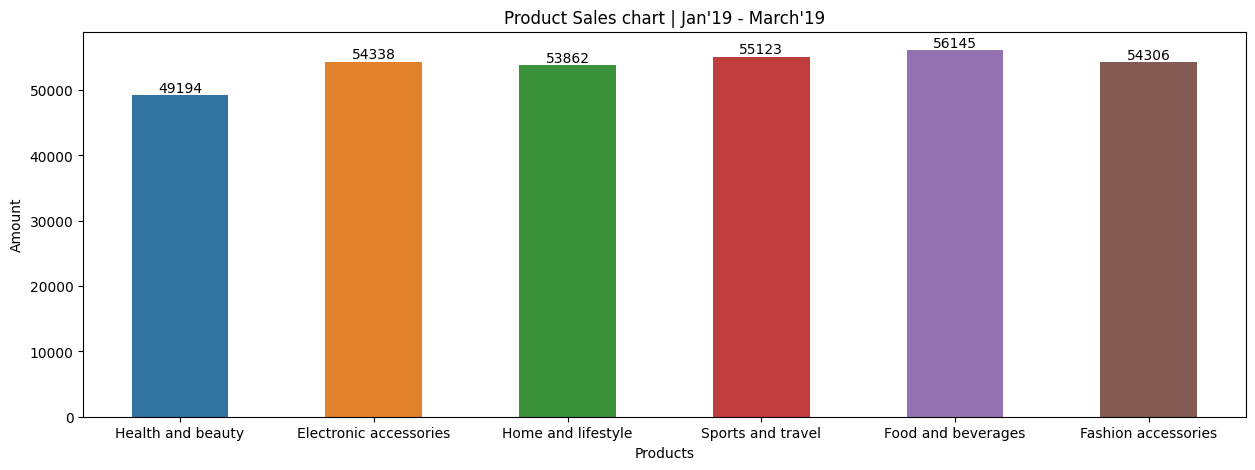

In [217]:
plt.figure(figsize=(15,5))
ax = sns.barplot(quarterly_sales,x="product line",y="quarterly_sales",width=0.5,hue="product line")
plt.title("Product Sales chart | Jan'19 - March'19")
plt.xlabel("Products")
plt.ylabel("Amount")
for container in ax.containers:
    ax.bar_label(container)

In [263]:
Branchwise_Sales = pd.read_sql_query("""SELECT branch, SUM(total) AS total_revenue FROM amazon GROUP BY branch order by branch""",dbcon)

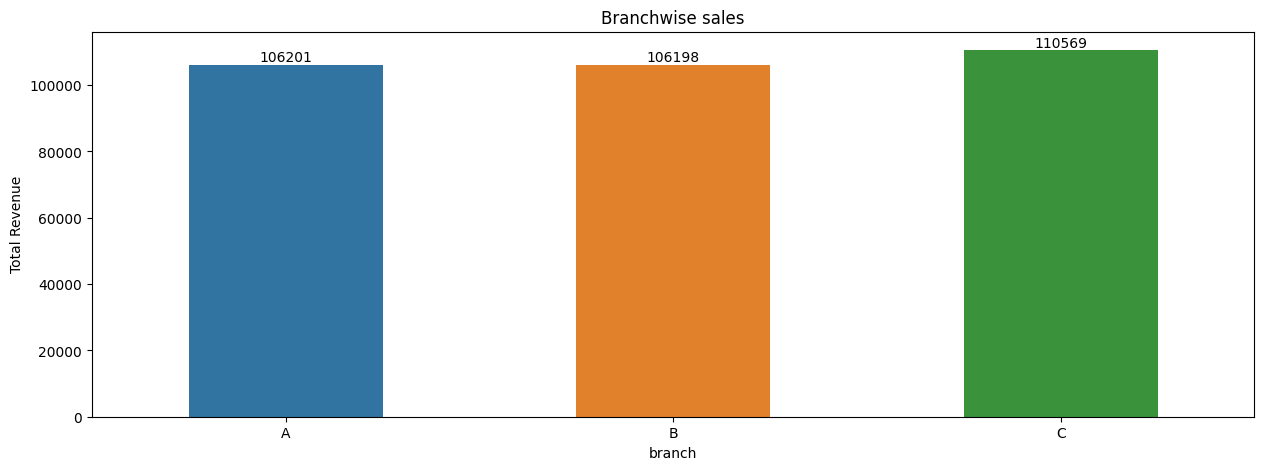

In [262]:
plt.figure(figsize=(15,5))
plt.title("Branchwise sales")
plt.ylabel("Total Revenue")
ax = sns.barplot(Branchwise_Sales,x="branch",y="total_revenue",hue="branch",width=.5)
for container in ax.containers:
    ax.bar_label(container)

### Customer Analysis

In [250]:
gender_distribution = pd.read_sql_query("""select gender,sum(quantity) as quantity_sold from amazon group by gender""",dbcon)

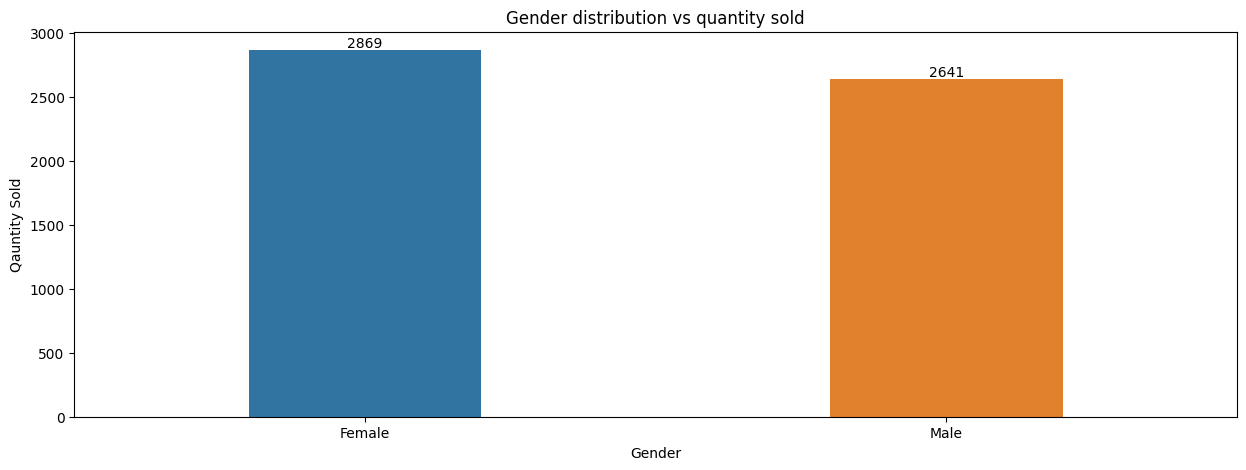

In [219]:
plt.figure(figsize=(15,5))
plt.title("Gender distribution vs quantity sold")
plt.xlabel("Gender")
plt.ylabel("Qauntity Sold")
ax = sns.barplot(gender_distribution,x="gender",y="quantity_sold",hue="gender",width=0.4)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [258]:
customer_type_distribution = pd.read_sql_query("""SELECT `customer type` as customer_type, COUNT(*) AS customer_count FROM amazon GROUP BY `customer_type`""",dbcon)

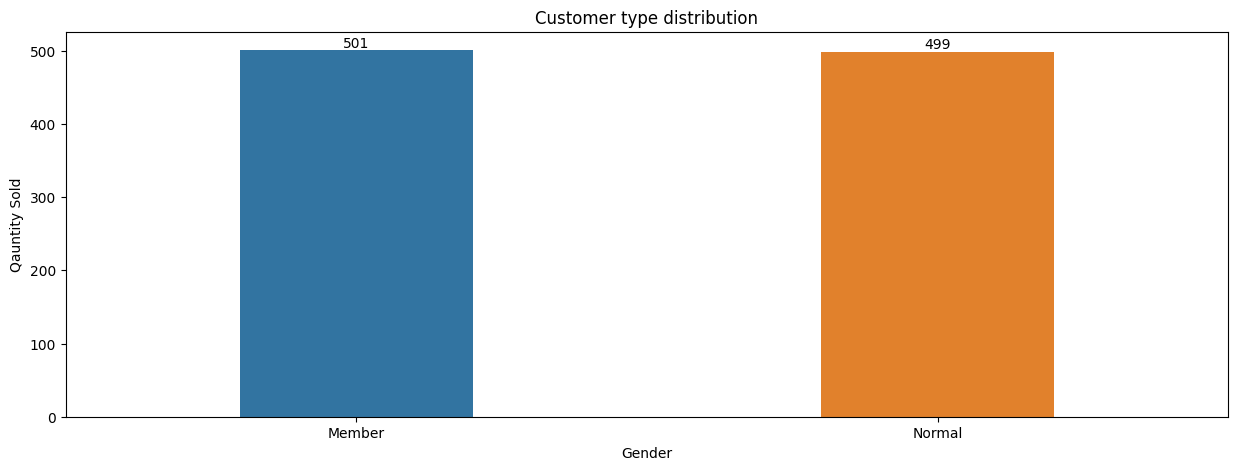

In [261]:
plt.figure(figsize=(15,5))
plt.title("Customer type distribution")
plt.xlabel("Gender")
plt.ylabel("Qauntity Sold")
ax = sns.barplot(customer_type_distribution,x="customer_type",y="customer_count",hue="customer_type",width=0.4)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### 1. What is the count of distinct cities in the dataset?

In [220]:
pd.read_sql_query("""select count(distinct city) as count from amazon""",dbcon)

,count
0,3


### 2. For each branch, what is the corresponding city?

In [221]:
pd.read_sql_query("""select distinct city,branch from amazon""",dbcon)

,city,branch
0,Yangon,A
1,Naypyitaw,C
2,Mandalay,B


### 3. What is the count of distinct product lines in the dataset?



In [222]:
pd.read_sql_query("""select count(distinct `Product line`) as count from amazon""",dbcon)

,count
0,6


### 4. Which payment method occurs most frequently?



In [223]:
pd.read_sql_query("""select payment, count(payment) count from amazon group by payment order by count desc limit 1""",dbcon)

,payment,count
0,Ewallet,345


### 5. Which product line has the highest sales?

In [224]:
pd.read_sql_query("""select `product line`,round(sum(total),2) as highest_sales from amazon group by `product line` order by highest_sales desc limit 1""",dbcon)

,product line,highest_sales
0,Food and beverages,56144.96


### 6. How much revenue is generated each month?


In [225]:
pd.read_sql_query("""select monthname(date) as month,round(sum(total),2) as monthly_revenue from amazon group by monthname(date);""",dbcon)

,month,monthly_revenue
0,January,116292.11
1,March,109455.74
2,February,97219.58


### 7. In which month did the cost of goods sold reach its peak?

In [226]:
pd.read_sql_query("""select monthname(date) as month,round(sum(cogs),2) as max_month_cogs from amazon group by monthname(date) order by max_month_cogs desc limit 1;""",dbcon)

,month,max_month_cogs
0,January,110754.16


### 8. Which product line generated the highest revenue?

In [227]:
pd.read_sql_query("""select `product line`,round(sum(total),2) as highest_revenue from amazon group by `product line` order by highest_revenue desc limit 1;""",dbcon)

,product line,highest_revenue
0,Food and beverages,56144.96


### 9. In which city was the highest revenue recorded?



In [228]:
pd.read_sql_query("""select city,round(sum(total),2) as highest_city_revenue from amazon group by city order by highest_city_revenue desc limit 1;""",dbcon)

,city,highest_city_revenue
0,Naypyitaw,110568.86


### 10. Which product line incurred the highest Value Added Tax?

In [229]:
pd.read_sql_query("""SELECT `product line`,round(sum(`Tax 5%`),2) as max_VAT_incurred FROM amazon group by `product line` order by max_VAT_incurred desc limit 1;""",dbcon)

,product line,max_VAT_incurred
0,Food and beverages,2673.56


### 11. For each product line, add a column indicating "Good" if its sales are above average, otherwise "Bad."

In [230]:
pd.read_sql_query("""select a.`invoice id`, case when a.total > b.avg_sales then 'Good' else 'Bad' end as sales_category from amazon a join (select `product line`, AVG(total) as avg_sales from amazon group by `product line`) b on a.`product line` = b.`product line` limit 5;""",dbcon)

,invoice id,sales_category
0,750-67-8428,Good
1,226-31-3081,Bad
2,631-41-3108,Good
3,123-19-1176,Good
4,373-73-7910,Good


### 12. Identify the branch that exceeded the average number of products sold.

In [231]:
pd.read_sql_query("""select branch from amazon group by branch having sum(quantity) > (select AVG(total_quantity) from (select sum(quantity) as total_quantity from amazon group by branch) as avg_sales);""",dbcon)

,branch
0,A


### 13. Which product line is most frequently associated with each gender?

In [232]:
pd.read_sql_query("""select gender, `product line` from (select gender, `product line`,rank() over(partition by gender order by product_line_count DESC) as ranking from (select gender, `product line`, count(*) as product_line_count from amazon group by gender, `product line`) as counts) as ranked where ranking= 1;""",dbcon)

,gender,product line
0,Female,Fashion accessories
1,Male,Health and beauty


### 14. Calculate the average rating for each product line.

In [233]:
pd.read_sql_query("""select `product line`,avg(rating) as avg_product_line_rating from amazon group by `product line`""",dbcon)

,product line,avg_product_line_rating
0,Health and beauty,7.00329
1,Electronic accessories,6.92471
2,Home and lifestyle,6.83750
3,Sports and travel,6.91627
4,Food and beverages,7.11322
5,Fashion accessories,7.02921


### 15. Count the sales occurrences for each time of day on every weekday

In [234]:
pd.read_sql_query("""SELECT 
    DATE_FORMAT(Time, '%H:%i') AS time_of_day,
    DATE_FORMAT(Time, '%W') AS weekday,
    COUNT(*) AS sales_occurrences
FROM amazon
GROUP BY time_of_day, weekday
ORDER BY FIELD(weekday, 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), time_of_day;
""",dbcon)

,time_of_day,weekday,sales_occurrences
0,10:00,Wednesday,3
1,10:01,Wednesday,2
2,10:02,Wednesday,3
3,10:03,Wednesday,1
4,10:04,Wednesday,1
...,...,...,...
501,20:52,Wednesday,1
502,20:54,Wednesday,2
503,20:55,Wednesday,1
504,20:57,Wednesday,1


### 16. Identify the customer type contributing the highest revenue.

In [235]:
pd.read_sql_query("""select `customer type`,sum(total) as revenue from amazon group by `customer type` order by revenue desc limit 1;""",dbcon)

,customer type,revenue
0,Member,164223.81


### 17. Determine the city with the highest VAT percentage.


In [236]:
pd.read_sql_query("""select city, (sum(`Tax 5%`) / sum(total)) * 100 as vat_percentage from amazon group by city order by vat_percentage desc limit 1;""",dbcon)

,city,vat_percentage
0,Naypyitaw,4.761898


### 18. Identify the customer type with the highest VAT payments.

In [237]:
pd.read_sql_query("""select `customer type`,sum(`Tax 5%`) as highest_VAT from amazon group by `customer type` order by highest_VAT desc limit 1
;""",dbcon)

,customer type,highest_VAT
0,Member,7820.164


### 19. What is the count of distinct customer types in the dataset?

In [238]:
pd.read_sql_query("""select count(distinct `customer type`) as distinct_customers from amazon;""",dbcon)

,distinct_customers
0,2


### 20. What is the count of distinct payment methods in the dataset?

In [239]:
pd.read_sql_query("""select count(distinct payment) as distinct_payment_method from amazon""",dbcon)

,distinct_payment_method
0,3


### 21. Which customer type occurs most frequently?

In [240]:
pd.read_sql_query("""select `customer type`, count(*) as frequency from amazon group by `customer type` order by frequency desc limit 1;
""",dbcon)

,customer type,frequency
0,Member,501


### 22. Identify the customer type with the highest purchase frequency.


In [241]:
pd.read_sql_query("""SELECT `customer type`, count(*) as purchase_frequency from amazon group by `customer type` order by purchase_frequency desc limit 1;
""",dbcon)

,customer type,purchase_frequency
0,Member,501


### 23. Determine the predominant gender among customers.


In [242]:
pd.read_sql_query("""select gender,count(gender) as gender_count from amazon group by gender order by gender_count desc limit 1 ;
""",dbcon)

,gender,gender_count
0,Female,501


### 24. Examine the distribution of genders within each branch.

In [243]:
pd.read_sql_query("""select branch, gender,count(gender) as gender_count from amazon group by branch,gender order by branch,gender;
""",dbcon)

,branch,gender,gender_count
0,A,Female,161
1,A,Male,179
2,B,Female,162
3,B,Male,170
4,C,Female,178
5,C,Male,150


### 25. Identify the time of day when customers provide the most ratings.

In [244]:
pd.read_sql_query("""select date_format(time,'%H') as hour,count(rating) as rating from amazon group by time order by rating desc;
""",dbcon)


,hour,rating
0,19,7
1,14,7
2,17,6
3,17,5
4,19,5
...,...,...
501,16,1
502,15,1
503,18,1
504,15,1


### 26. Determine the time of day with the highest customer ratings for each branch.

In [245]:
pd.read_sql_query("""WITH ranked_hours AS (
    SELECT 
        branch, 
        DATE_FORMAT(time, '%H') AS hour_of_day,
        AVG(rating) AS avg_rating,
        RANK() OVER (PARTITION BY branch ORDER BY AVG(rating) DESC) AS rating_rank
    FROM amazon
    GROUP BY branch, hour_of_day
)
SELECT branch, hour_of_day, avg_rating
FROM ranked_hours
WHERE rating_rank = 1;
""",dbcon)


,branch,hour_of_day,avg_rating
0,A,18,7.31818
1,B,12,7.39600
2,C,12,7.36774


### 27. Identify the day of the week with the highest average ratings.

In [246]:
pd.read_sql_query("""select dayname(date) as day_name, avg(rating) as avg_rating  from amazon group by day_name order by avg_rating desc limit 1
""",dbcon)

,day_name,avg_rating
0,Monday,7.1536


### 28. Determine the day of the week with the highest average ratings for each branch.

In [247]:
pd.read_sql_query("""WITH ranked_days AS (
    SELECT 
        branch, 
        DAYNAME(date) AS day_of_week,
        AVG(rating) AS avg_rating,
        RANK() OVER (PARTITION BY branch ORDER BY AVG(rating) DESC) AS rating_rank
    FROM amazon
    GROUP BY branch, day_of_week
)
SELECT branch, day_of_week, avg_rating
FROM ranked_days
WHERE rating_rank = 1;
""",dbcon)

,branch,day_of_week,avg_rating
0,A,Friday,7.31200
1,B,Monday,7.33590
2,C,Friday,7.27895
